In [14]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

def simulate_market_data(days, seed=42):
    np.random.seed(seed)  # 设置随机种子
    opens = []
    closes = []
    highs = []
    lows = []
    price = 100
    for _ in range(days):
        today_open = price + np.random.uniform(-1.5, 1.5)
        today_close = today_open + np.random.uniform(-1.5, 1.5)
        price = today_close
        today_high = max(today_open, today_close) + np.random.uniform(0, 2)
        today_low = min(today_open, today_close) - np.random.uniform(0, 2)
        opens.append(today_open)
        highs.append(today_high)
        lows.append(today_low)
        closes.append(today_close)
        
    df = pd.DataFrame({
        'Open': opens,
        'High': highs,
        'Low': lows,
        'Close': closes
    }, index=pd.date_range(start='2020-01-01', periods=days))
    return df

def detect_wedges(df, window=20, threshold=0.05):
    """
    检测楔形图案。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 候选楔形图案的宽度，基于bar计数
    threshold : 边界线回归斜率的差异阈值
    """
    wedges = []
    for i in range(window, len(df)):
        high = df['High'][i-window:i]
        low = df['Low'][i-window:i]
        
        high_slope, high_intercept, _, _, _ = linregress(range(window), high)
        low_slope, low_intercept, _, _, _ = linregress(range(window), low)
        
        # 判断两条线的收敛性
        if abs(high_slope-low_slope) < threshold:
            middle_price = (high_intercept + low_intercept) / 2
            wedges.append({'start': i-window, 'end': i, 'mid_price': middle_price})
    
    return wedges

def detect_breakouts(df, window=20):
    """
    检测突破模式。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 突破检测窗口大小，基于bar计数
    """
    breakouts = []
    for i in range(window, len(df)):
        recent_range = df[i-window:i]
        if df['High'][i] > recent_range['High'].max():
            # 向上突破
            breakouts.append({'date': df.index[i], 'price': df['High'][i], 'type': 'up'})
        elif df['Low'][i] < recent_range['Low'].min():
            # 向下突破
            breakouts.append({'date': df.index[i], 'price': df['Low'][i], 'type': 'down'})
    
    return breakouts


# 可视化函数，用于展示检测到的图案
def plot_detected_patterns(df, wedges, breakouts):
    plt.figure(figsize=(15, 7))
    plt.title("Detected Patterns")
    plt.plot(df.index, df['High'], label='High')
    plt.plot(df.index, df['Low'], label='Low')
    
    for wedge in wedges:
        plt.axvspan(df.index[wedge['start']], df.index[wedge['end']], color='orange', alpha=0.3)
    
    for breakout in breakouts:
        color = 'green' if breakout['type'] == 'up' else 'red'
        plt.axvline(x=breakout['date'], color=color, linestyle='--')
    
    plt.legend()
    plt.show()

/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/3836626404.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['High'][i] > recent_range['High'].max():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/3836626404.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Low'][i] < recent_range['Low'].min():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/3836626404.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

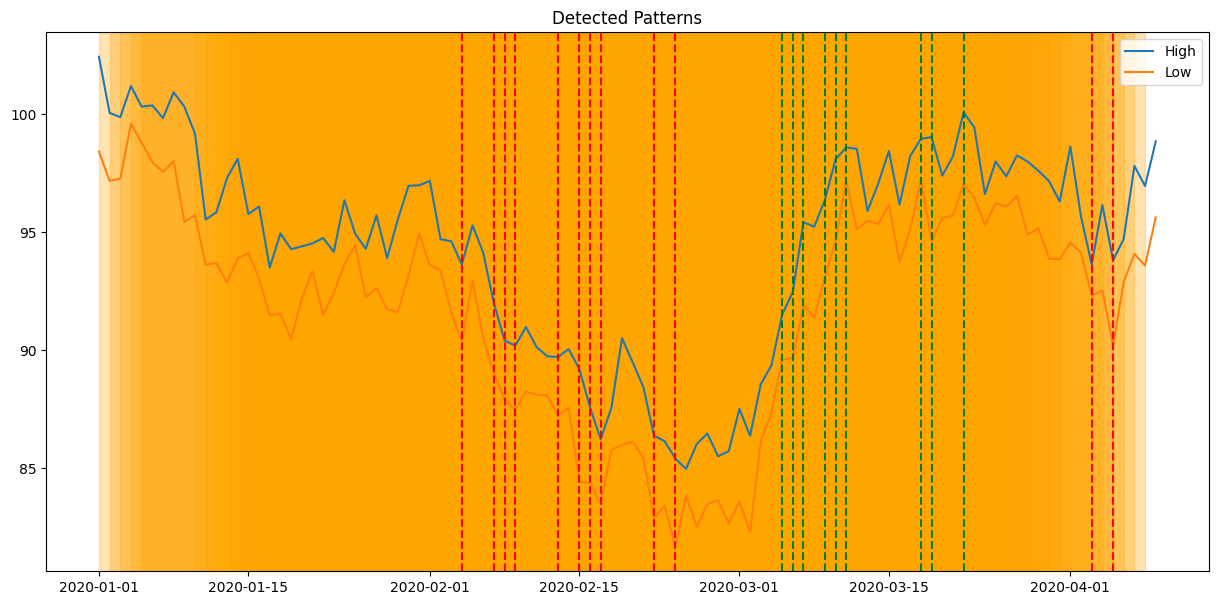

In [15]:
# 模拟数据
days = 100  # 假设需要100天的数据
market_data = simulate_market_data(days)

# 检测楔形和突破
wedges = detect_wedges(market_data)
breakouts = detect_breakouts(market_data)

# 可视化
plot_detected_patterns(market_data, wedges, breakouts)

In [46]:


def simulate_market_data(days, seed=42):
    np.random.seed(seed)  # 设置随机种子
    opens = []
    closes = []
    highs = []
    lows = []
    price = 100
    for _ in range(days):
        today_open = price + np.random.uniform(-1.5, 1.5)
        today_close = today_open + np.random.uniform(-1.5, 1.5)
        price = today_close
        today_high = max(today_open, today_close) + np.random.uniform(0, 2)
        today_low = min(today_open, today_close) - np.random.uniform(0, 2)
        opens.append(today_open)
        highs.append(today_high)
        lows.append(today_low)
        closes.append(today_close)
        
    df = pd.DataFrame({
        'Open': opens,
        'High': highs,
        'Low': lows,
        'Close': closes
    }, index=pd.date_range(start='2020-01-01', periods=days))
    return df


import numpy as np
import pandas as pd
from scipy.stats import linregress
import mplfinance as mpf
import matplotlib.dates as mdates  # 导入matplotlib的dates模块



def detect_wedges(df, window=20, threshold=0.05):
    """
    检测楔形图案。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 候选楔形图案的宽度，基于bar计数
    threshold : 边界线回归斜率的差异阈值
    """
    wedges = []
    for i in range(window, len(df)):
        high = df['High'][i-window:i]
        low = df['Low'][i-window:i]
        
        high_slope, high_intercept, _, _, _ = linregress(range(window), high)
        low_slope, low_intercept, _, _, _ = linregress(range(window), low)
        
        # 判断两条线的收敛性
        if abs(high_slope-low_slope) < threshold:
            middle_price = (high_intercept + low_intercept) / 2
            wedges.append({'start': i-window, 'end': i, 'mid_price': middle_price})
    
    return wedges

def detect_breakouts(df, window=20):
    """
    检测突破模式。
    df : 包含 'High', 'Low' 列的 DataFrame
    window : 突破检测窗口大小，基于bar计数
    """
    breakouts = []
    for i in range(window, len(df)):
        recent_range = df[i-window:i]
        if df['High'][i] > recent_range['High'].max():
            # 向上突破
            breakouts.append({'date': df.index[i], 'price': df['High'][i], 'type': 'up'})
        elif df['Low'][i] < recent_range['Low'].min():
            # 向下突破
            breakouts.append({'date': df.index[i], 'price': df['Low'][i], 'type': 'down'})
    
    return breakouts

def plot_with_mplfinance(df, wedges, breakouts, window=20):
    apds = []

    for wedge in wedges:
        start_index = wedge['start']
        end_index = wedge['end']

        # 使用提供的索引来计算高点和低点线性回归
        high_values = df['High'][start_index:end_index]
        low_values = df['Low'][start_index:end_index]
        high_dates = np.arange(start_index, end_index)
        low_dates = np.arange(start_index, end_index)

        high_slope, high_intercept, _, _, _ = linregress(high_dates, high_values)
        low_slope, low_intercept, _, _, _ = linregress(low_dates, low_values)
        
        # 生成高点和低点的趋势线，使其在非楔形部分为NaN
        high_line = pd.Series(index=df.index, data=np.nan)
        low_line = pd.Series(index=df.index, data=np.nan)
        high_line.iloc[start_index:end_index] = high_slope * (high_dates - start_index) + high_intercept
        low_line.iloc[start_index:end_index] = low_slope * (low_dates - start_index) + low_intercept

        apds.append(mpf.make_addplot(high_line, type='line', color='orange'))
        apds.append(mpf.make_addplot(low_line, type='line', color='orange'))


     # 添加突破点标记
    if breakouts:  # 如果有突破点
        breakout_df = pd.DataFrame(breakouts)
        breakout_dates = breakout_df['date'].apply(mdates.date2num).values  # 把日期转换成matplotlib格式
        breakout_prices = breakout_df['price'].values  # 获取价格值
        type_colors = {'up': 'green', 'down': 'red'}

        # 对每种类型的突破（向上和向下）分别处理
        for breakout_type in type_colors:
            # 筛选出对应类型的突破点
            mask = breakout_df['type'] == breakout_type
            dates = breakout_dates[mask]
            prices = breakout_prices[mask]
            marker = '^' if breakout_type == 'up' else 'v'  # 向上突破使用三角形标记，向下突破使用倒三角形标记
            color = type_colors[breakout_type]
            
            if len(dates) > 0:  # 如果有突破点
                apds.append(mpf.make_addplot(prices, type='scatter', markersize=200, marker=marker, color=color, panel=0, secondary_y=False, xAxis=dates))

    # 绘制K线图和附加图案
    mpf.plot(df, type='candle', style='yahoo', addplot=apds, title='Detected Patterns on K-line', volume=False)

# 主程序
days = 100
market_data = simulate_market_data(days)

# 检测楔形和突破
wedges = detect_wedges(market_data, window=20, threshold=0.05)
breakouts = detect_breakouts(market_data, window=20)

# 使用mplfinance绘图
plot_with_mplfinance(market_data, wedges, breakouts, window=20)

/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/2344411527.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['High'][i] > recent_range['High'].max():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/2344411527.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Low'][i] < recent_range['Low'].min():
/var/folders/4n/ssdlv9m155j06vdf68lmf_480000gn/T/ipykernel_83905/2344411527.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

KeyError: 'Unrecognized kwarg="xAxis"'